In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
a = []

In [ ]:
df = pd.read_csv("./1234_added_cols.csv", sep = ';')
drop_cols = ['isna', 'student_group','student_name', 'person_id', 'project_id', 'rate_total', 'project_head']
df = df.drop(columns = drop_cols)

cat_features = ['stepen', 'course']
df[cat_features] = df[cat_features].astype(str)

In [ ]:
metrics = pd.DataFrame(columns = ['task', 'precision', 'recall', 'f1', 'rocauc'])

In [ ]:
cat_features

['stepen', 'course']

In [ ]:
df= df.replace('nan', np.nan)

In [ ]:
label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target_multiclass'])

In [ ]:
X = df.drop(columns=['target_multiclass', 'target_encoded', 'target'])  
y = df['target_encoded']

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
X[cat_features] = X[cat_features].fillna('nan')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = CatBoostClassifier(
    loss_function='MultiClass',
    eval_metric='Accuracy',
    verbose=100,
    random_seed=42, cat_features = cat_features
)

model.fit(X_train, y_train, early_stopping_rounds=20)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('TRAIN')
print(classification_report(y_train, y_pred_train))
print('TEST')
print(classification_report(y_test, y_pred))

Learning rate set to 0.079074
0:	learn: 0.4994934	total: 148ms	remaining: 2m 28s
100:	learn: 0.6686930	total: 5.76s	remaining: 51.3s
200:	learn: 0.8237082	total: 13.3s	remaining: 52.9s
300:	learn: 0.8956434	total: 19.1s	remaining: 44.4s
400:	learn: 0.9463019	total: 27.1s	remaining: 40.5s
500:	learn: 0.9726444	total: 35s	remaining: 34.8s
600:	learn: 0.9878419	total: 38.4s	remaining: 25.5s
700:	learn: 0.9939210	total: 41s	remaining: 17.5s
800:	learn: 0.9969605	total: 44.2s	remaining: 11s
900:	learn: 0.9989868	total: 51s	remaining: 5.6s
999:	learn: 1.0000000	total: 56.8s	remaining: 0us
TRAIN
              precision    recall  f1-score   support

           0       0.86      0.70      0.77        80
           1       0.92      0.95      0.93       475
           2       0.84      0.80      0.82        74
           3       0.90      0.91      0.91       358

    accuracy                           0.90       987
   macro avg       0.88      0.84      0.86       987
weighted avg       0.90 

In [ ]:
report = classification_report(y_train, y_pred_train, output_dict=True)
report_test = classification_report(y_test, y_pred, output_dict=True)

res = pd.DataFrame(report).transpose().add_suffix('_train').merge(pd.DataFrame(report_test).transpose().add_suffix('_test'), left_index=True, right_index=True).rename('{}_baseline'.format)
a.append(res)


In [ ]:
y.value_counts()

,count
target_encoded,
1,594
3,448
0,100
2,92


In [ ]:
df['target_multiclass'].value_counts()

,count
target_multiclass,
Отл,594
Хор,448
Неуд,100
Уд,92


In [ ]:
(classification_report(y_train, y_pred_train))

'              precision    recall  f1-score   support\n\n           0       0.86      0.70      0.77        80\n           1       0.92      0.95      0.93       475\n           2       0.84      0.80      0.82        74\n           3       0.90      0.91      0.91       358\n\n    accuracy                           0.90       987\n   macro avg       0.88      0.84      0.86       987\nweighted avg       0.90      0.90      0.90       987\n'

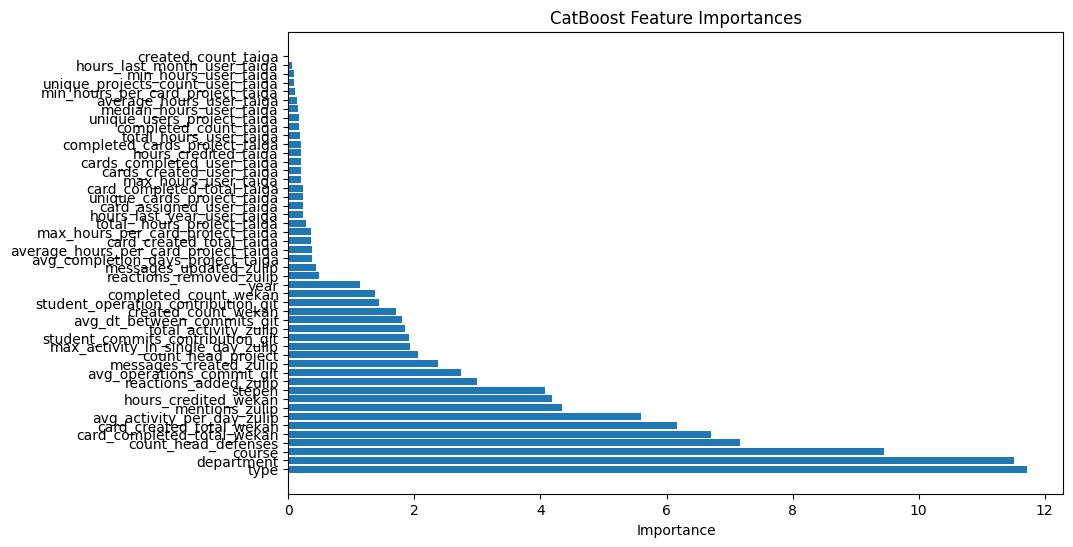

In [ ]:
import matplotlib.pyplot as plt

importances = model.get_feature_importance(Pool(X_train, y_train, cat_features=cat_features))

x = (dict(zip(X_train.columns, importances)))
x = dict(sorted(x.items(), key=lambda kv: kv[1]))

plt.figure(figsize=(10, 6))
plt.barh(x.keys(), x.values())
plt.title("CatBoost Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
x

{'created_count_taiga': np.float64(0.013250985295357643),
 'hours_last_month_user_taiga': np.float64(0.056908145010569934),
 'min_hours_user_taiga': np.float64(0.08033703923262042),
 'unique_projects_count_user_taiga': np.float64(0.08661076334128806),
 'min_hours_per_card_project_taiga': np.float64(0.10875670220483044),
 'average_hours_user_taiga': np.float64(0.13550073940353463),
 'median_hours_user_taiga': np.float64(0.15239505234212958),
 'unique_users_project_taiga': np.float64(0.16842675383003083),
 'completed_count_taiga': np.float64(0.17146170162118843),
 'total_hours_user_taiga': np.float64(0.18132986431456524),
 'completed_cards_project_taiga': np.float64(0.19664224941364716),
 'hours_credited_taiga': np.float64(0.20039370688626207),
 'cards_completed_user_taiga': np.float64(0.201624127072067),
 'cards_created_user_taiga': np.float64(0.20414461697024758),
 'max_hours_user_taiga': np.float64(0.20565362963701395),
 'card_completed_total_taiga': np.float64(0.22490207968350298),
 

In [ ]:
import shap

explainer = shap.Explainer(model)
shaps = explainer(X_train)

shaps.shape

(987, 48, 4)

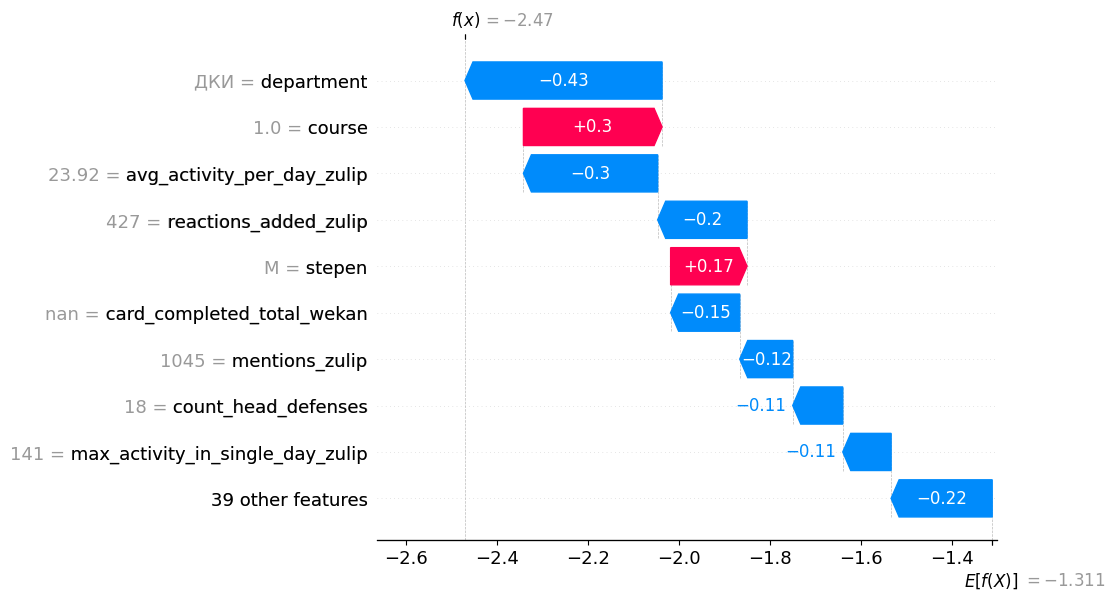

In [ ]:
shap.plots.waterfall(shaps[0, :, 0]) # неуд

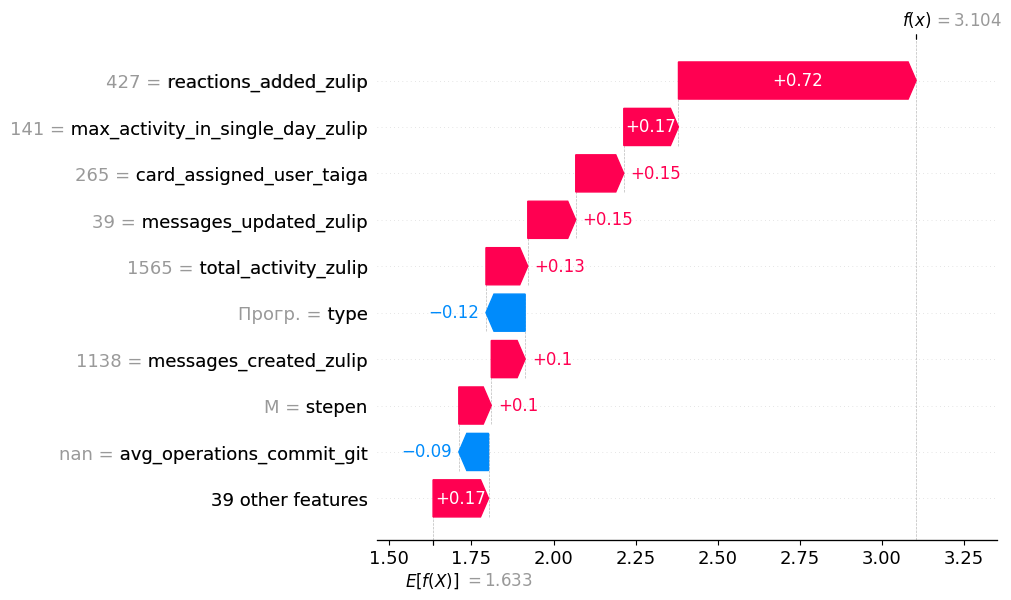

In [ ]:
shap.plots.waterfall(shaps[0, :, 1]) #'отл'

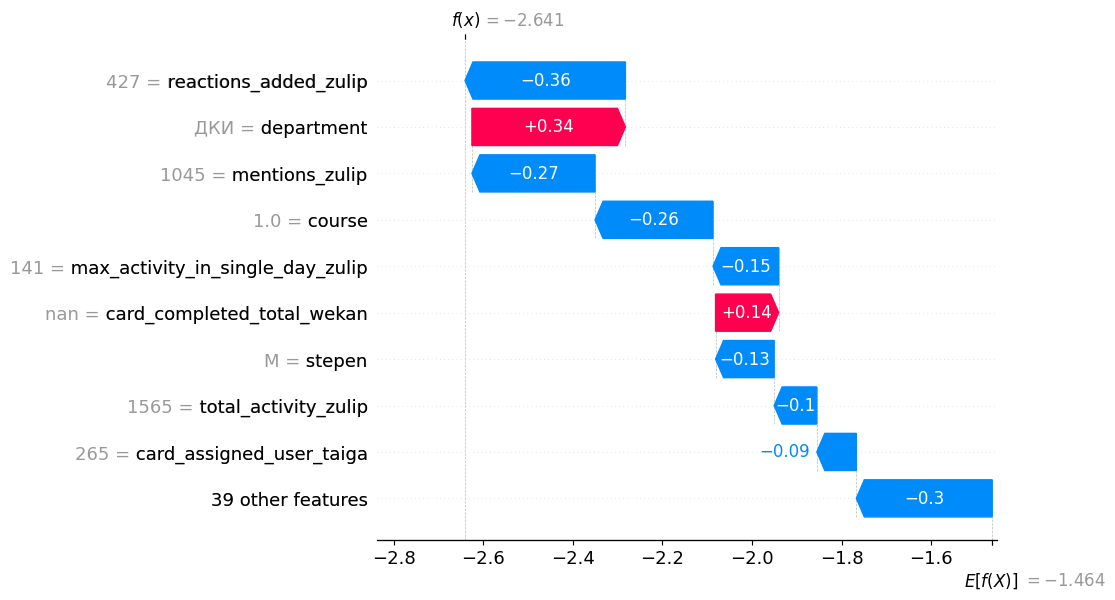

In [ ]:
shap.plots.waterfall(shaps[0, :, 2]) # уд


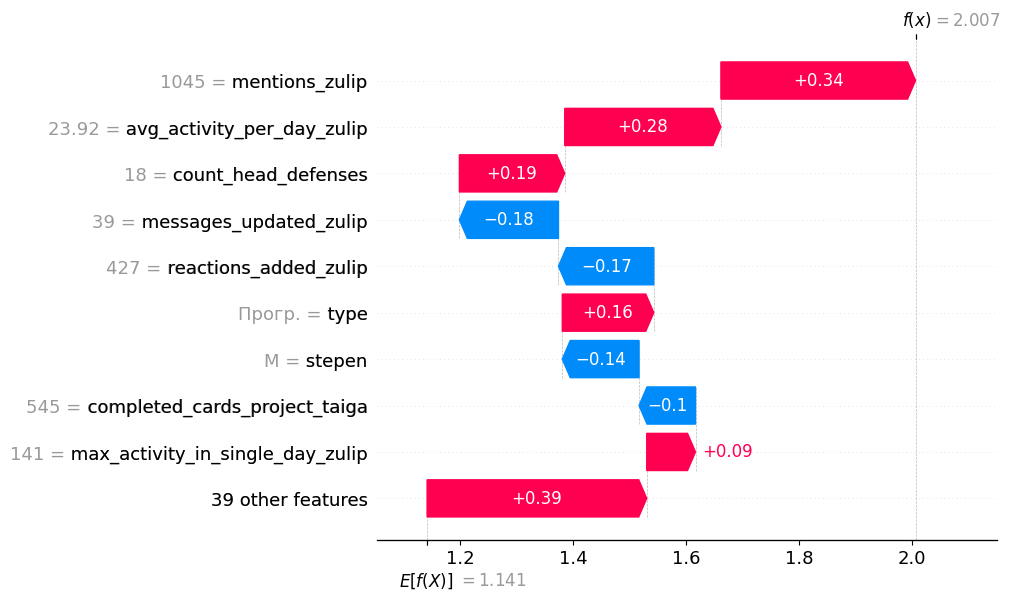

In [ ]:
shap.plots.waterfall(shaps[0, :, 3])  # хор


# взвешивание классов при обучении. Исключение признака year, department

In [ ]:
from catboost import CatBoostClassifier

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
X = df.drop(columns=['target_multiclass', 'target_encoded', 'target', 'year', 'department'])  # Убедитесь, что тут только фичи
y = df['target_encoded']

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
X[cat_features] = X[cat_features].fillna('nan')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

model = CatBoostClassifier(
    eval_metric='MultiClass',
    class_weights=class_weights_dict,
    verbose=100, cat_features = cat_features
)
model.fit(X_train, y_train, early_stopping_rounds=20)



y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('TRAIN')
print(classification_report(y_train, y_pred_train))
print('TEST')
print(classification_report(y_test, y_pred))

Learning rate set to 0.079074
0:	learn: 1.3674987	total: 57.5ms	remaining: 57.5s
100:	learn: 0.9054402	total: 3.87s	remaining: 34.5s
200:	learn: 0.6088900	total: 5.8s	remaining: 23.1s
300:	learn: 0.4720886	total: 8.53s	remaining: 19.8s
400:	learn: 0.3832210	total: 10.1s	remaining: 15.2s
500:	learn: 0.3176321	total: 11.8s	remaining: 11.7s
600:	learn: 0.2740425	total: 13.3s	remaining: 8.82s
700:	learn: 0.2366652	total: 14.8s	remaining: 6.33s
800:	learn: 0.2087267	total: 16.3s	remaining: 4.06s
900:	learn: 0.1859773	total: 17.9s	remaining: 1.96s
999:	learn: 0.1674975	total: 20.2s	remaining: 0us
TRAIN
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        80
           1       0.92      0.93      0.92       475
           2       0.83      0.85      0.84        74
           3       0.92      0.86      0.89       358

    accuracy                           0.89       987
   macro avg       0.85      0.88      0.86       987
weighted avg    

In [ ]:
report = classification_report(y_train, y_pred_train, output_dict=True)
report_test = classification_report(y_test, y_pred, output_dict=True)

res = pd.DataFrame(report).transpose().add_suffix('_train').merge(pd.DataFrame(report_test).transpose().add_suffix('_test'), left_index=True, right_index=True).rename('{}_weight_class'.format)
a.append(res)


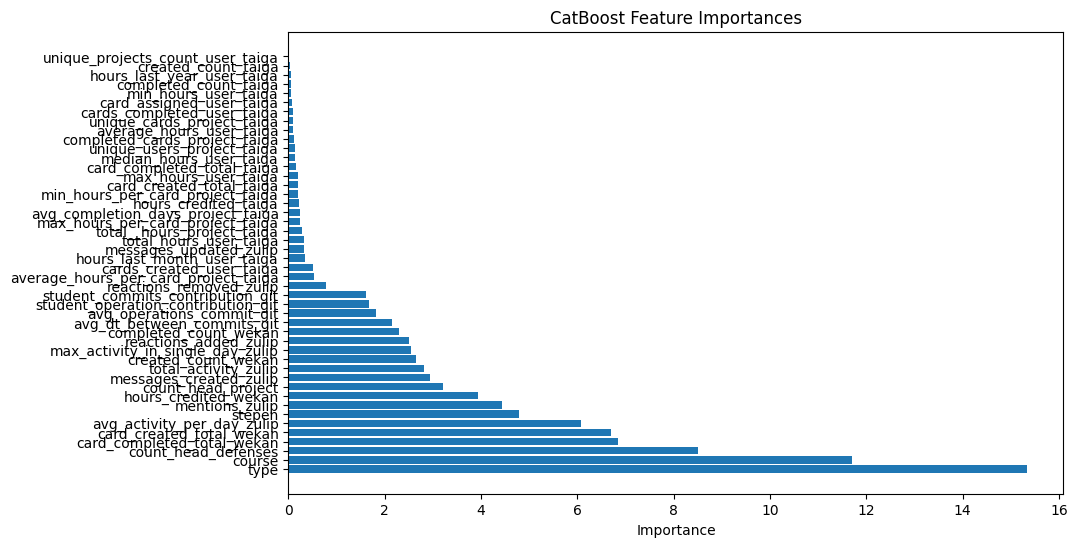

In [ ]:
import matplotlib.pyplot as plt

importances = model.get_feature_importance(Pool(X_train, y_train, cat_features=cat_features))
# feat_names = selected_features

x = (dict(zip(X_train.columns, importances)))
x = dict(sorted(x.items(), key=lambda kv: kv[1]))

plt.figure(figsize=(10, 6))
plt.barh(x.keys(), x.values())
plt.title("CatBoost Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


# smote

In [ ]:
from imblearn.over_sampling import SMOTE

cat_features = X_train.select_dtypes(include='object').columns.tolist()
for col in cat_features:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col].astype(str))
    X_test[col] = encoder.transform(X_test[col].astype(str))

smote = SMOTE(random_state=42)
X_train = X_train.fillna(-999)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
y.value_counts()

,count
target_encoded,
1,594
3,448
0,100
2,92


In [ ]:
y_resampled.value_counts()

,count
target_encoded,
1,475
3,475
0,475
2,475


In [ ]:
model.fit(X_resampled, y_resampled) # train on RESAMPLED! data

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('TRAIN')
print(classification_report(y_train, y_pred_train))
print('TEST')
print(classification_report(y_test, y_pred))

Learning rate set to 0.08176
0:	learn: 1.3399998	total: 29.7ms	remaining: 29.7s
100:	learn: 0.5889443	total: 2.9s	remaining: 25.8s
200:	learn: 0.3920131	total: 7.04s	remaining: 28s
300:	learn: 0.3177555	total: 11.5s	remaining: 26.6s
400:	learn: 0.2723759	total: 14.6s	remaining: 21.8s
500:	learn: 0.2411365	total: 17.7s	remaining: 17.7s
600:	learn: 0.2147067	total: 20.8s	remaining: 13.8s
700:	learn: 0.1954643	total: 25.3s	remaining: 10.8s
800:	learn: 0.1813255	total: 28.3s	remaining: 7.04s
900:	learn: 0.1661506	total: 31.4s	remaining: 3.45s
999:	learn: 0.1540491	total: 35.4s	remaining: 0us
TRAIN
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        80
           1       0.98      0.77      0.86       475
           2       0.53      0.95      0.68        74
           3       0.89      0.84      0.86       358

    accuracy                           0.82       987
   macro avg       0.74      0.89      0.78       987
weighted avg       

In [ ]:
report = classification_report(y_train, y_pred_train, output_dict=True)
report_test = classification_report(y_test, y_pred, output_dict=True)

smote_res = pd.DataFrame(report).transpose().add_suffix('_train').merge(pd.DataFrame(report_test).transpose().add_suffix('_test'), left_index=True, right_index=True).rename('{}_smote'.format)
a.append(smote_res)


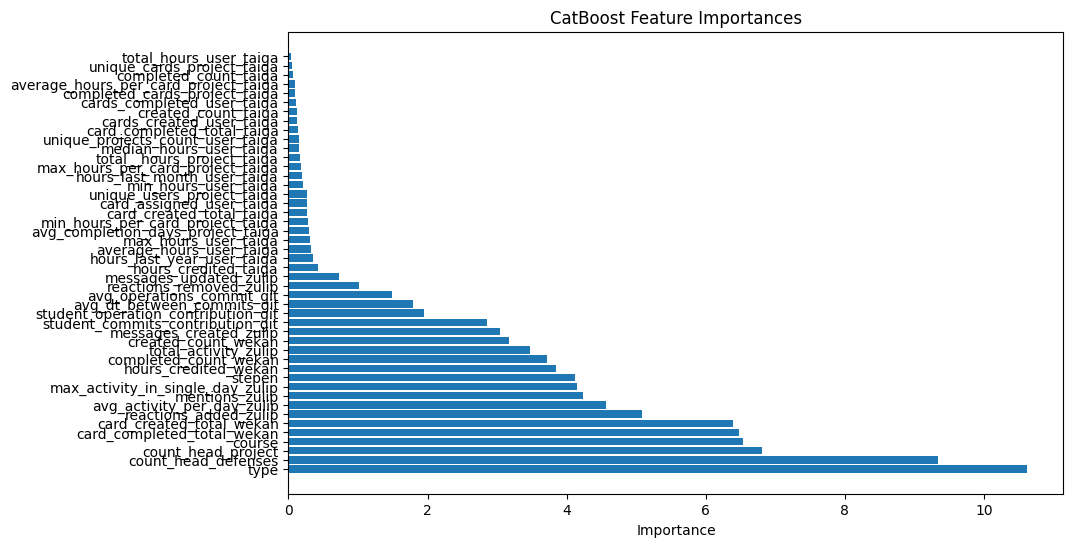

In [ ]:
import matplotlib.pyplot as plt

importances = model.get_feature_importance(Pool(X_train, y_train, cat_features=cat_features))

x = (dict(zip(X_train.columns, importances)))
x = dict(sorted(x.items(), key=lambda kv: kv[1]))

plt.figure(figsize=(10, 6))
plt.barh(x.keys(), x.values())
plt.title("CatBoost Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
pd.concat(a)

,precision_train,recall_train,f1-score_train,support_train,precision_test,recall_test,f1-score_test,support_test
0_baseline,0.861538,0.700000,0.772414,80.000000,0.230769,0.150000,0.181818,20.000000
1_baseline,0.922131,0.947368,0.934579,475.000000,0.576389,0.697479,0.631179,119.000000
2_baseline,0.842857,0.797297,0.819444,74.000000,0.000000,0.000000,0.000000,18.000000
3_baseline,0.898352,0.913408,0.905817,358.000000,0.488095,0.455556,0.471264,90.000000
accuracy_baseline,0.903749,0.903749,0.903749,0.903749,0.514170,0.514170,0.514170,0.514170
macro avg_baseline,0.881220,0.839518,0.858064,987.000000,0.323813,0.325759,0.321065,247.000000
weighted avg_baseline,0.902651,0.903749,0.902371,987.000000,0.474228,0.514170,0.490528,247.000000
0_weight_class,0.739583,0.887500,0.806818,80.000000,0.350000,0.350000,0.350000,20.000000
1_weight_class,0.920668,0.928421,0.924528,475.000000,0.585938,0.630252,0.607287,119.000000
2_weight_class,0.828947,0.851351,0.840000,74.000000,0.111111,0.055556,0.074074,18.000000


# weighted. select_features

In [ ]:
X = df.drop(columns=['target_multiclass', 'target_encoded', 'target', 'year', 'department', 'type', 'course'])
y = df['target_encoded']

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
X[cat_features] = X[cat_features].fillna('nan')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

model = CatBoostClassifier(
    eval_metric='MultiClass',
    class_weights=class_weights_dict,
    verbose=100, cat_features = cat_features
)
model.fit(X_train, y_train, early_stopping_rounds=20)



y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

Learning rate set to 0.079074
0:	learn: 1.3779506	total: 15.5ms	remaining: 15.5s
100:	learn: 0.9613853	total: 1.08s	remaining: 9.61s
200:	learn: 0.6681146	total: 2.17s	remaining: 8.64s
300:	learn: 0.5213052	total: 3.25s	remaining: 7.55s
400:	learn: 0.4361404	total: 4.34s	remaining: 6.48s
500:	learn: 0.3737259	total: 5.46s	remaining: 5.43s
600:	learn: 0.3211107	total: 6.58s	remaining: 4.37s
700:	learn: 0.2841243	total: 7.67s	remaining: 3.27s
800:	learn: 0.2540898	total: 8.89s	remaining: 2.21s
900:	learn: 0.2293545	total: 10.4s	remaining: 1.14s
999:	learn: 0.2096954	total: 12.4s	remaining: 0us


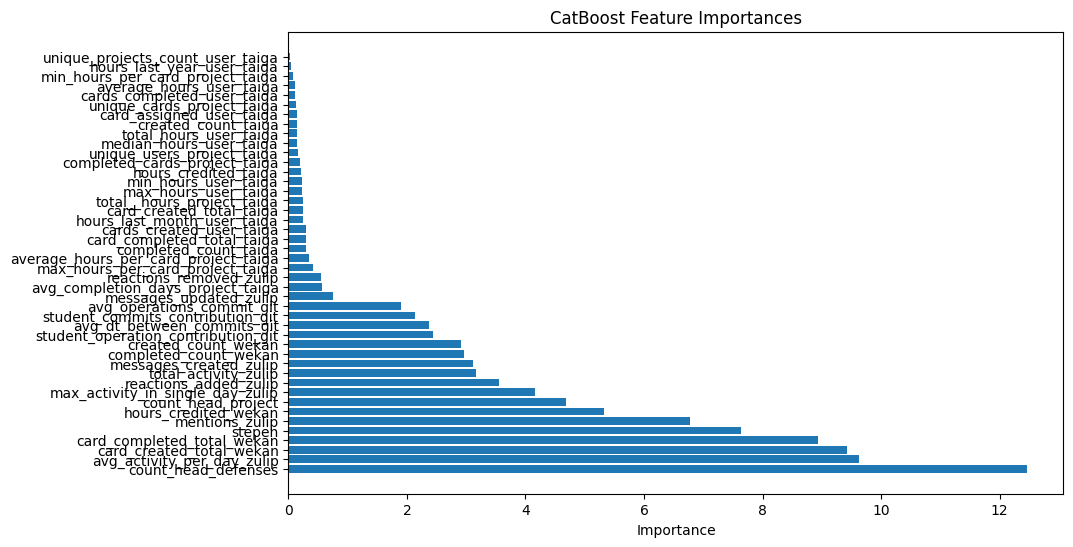

In [ ]:
import matplotlib.pyplot as plt

importances = model.get_feature_importance(Pool(X_train, y_train, cat_features=cat_features))

x = (dict(zip(X_train.columns, importances)))
x = dict(sorted(x.items(), key=lambda kv: kv[1]))

plt.figure(figsize=(10, 6))
plt.barh(x.keys(), x.values())
plt.title("CatBoost Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


<Axes: >

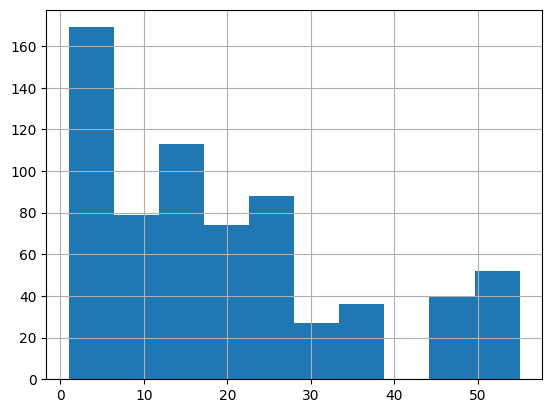

In [ ]:
df['count_head_defenses'].hist()

In [ ]:
x

{'unique_projects_count_user_taiga': np.float64(0.03251755082251468),
 'hours_last_year_user_taiga': np.float64(0.037921681447234325),
 'min_hours_per_card_project_taiga': np.float64(0.08418009942515596),
 'average_hours_user_taiga': np.float64(0.10471163529526689),
 'cards_completed_user_taiga': np.float64(0.1165880772271901),
 'unique_cards_project_taiga': np.float64(0.13222811721415642),
 'card_assigned_user_taiga': np.float64(0.13557185512278203),
 'created_count_taiga': np.float64(0.15061650579469582),
 'total_hours_user_taiga': np.float64(0.15198717761883046),
 'median_hours_user_taiga': np.float64(0.1521518879642623),
 'unique_users_project_taiga': np.float64(0.16640637873795774),
 'completed_cards_project_taiga': np.float64(0.19771683619806946),
 'hours_credited_taiga': np.float64(0.21896286856928915),
 'min_hours_user_taiga': np.float64(0.22622032300067604),
 'max_hours_user_taiga': np.float64(0.23477062789737946),
 'total__hours_project_taiga': np.float64(0.2413842657007896),

In [ ]:
print('TRAIN')
print(classification_report(y_train, y_pred_train))
print('TEST')
print(classification_report(y_test, y_pred)) # no head defenses

TRAIN
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        80
           1       0.98      0.93      0.95       475
           2       0.79      0.97      0.87        74
           3       0.95      0.92      0.93       358

    accuracy                           0.93       987
   macro avg       0.87      0.94      0.90       987
weighted avg       0.94      0.93      0.93       987

TEST
              precision    recall  f1-score   support

           0       0.38      0.40      0.39        20
           1       0.61      0.62      0.61       119
           2       0.29      0.22      0.25        18
           3       0.49      0.49      0.49        90

    accuracy                           0.53       247
   macro avg       0.44      0.43      0.44       247
weighted avg       0.52      0.53      0.52       247



In [ ]:
cat_features

['stepen']

In [ ]:
report = classification_report(y_train, y_pred_train, output_dict=True)
report_test = classification_report(y_test, y_pred, output_dict=True)

res = pd.DataFrame(report).transpose().add_suffix('_train').merge(pd.DataFrame(report_test).transpose().add_suffix('_test'), left_index=True, right_index=True).rename('{}_weighted_selected_features1'.format)
a.append(res)


In [ ]:
pd.concat(a)

,precision_train,recall_train,f1-score_train,support_train,precision_test,recall_test,f1-score_test,support_test
0_baseline,0.861538,0.700000,0.772414,80.000000,0.230769,0.150000,0.181818,20.000000
1_baseline,0.922131,0.947368,0.934579,475.000000,0.576389,0.697479,0.631179,119.000000
2_baseline,0.842857,0.797297,0.819444,74.000000,0.000000,0.000000,0.000000,18.000000
3_baseline,0.898352,0.913408,0.905817,358.000000,0.488095,0.455556,0.471264,90.000000
accuracy_baseline,0.903749,0.903749,0.903749,0.903749,0.514170,0.514170,0.514170,0.514170
macro avg_baseline,0.881220,0.839518,0.858064,987.000000,0.323813,0.325759,0.321065,247.000000
weighted avg_baseline,0.902651,0.903749,0.902371,987.000000,0.474228,0.514170,0.490528,247.000000
0_weight_class,0.739583,0.887500,0.806818,80.000000,0.350000,0.350000,0.350000,20.000000
1_weight_class,0.920668,0.928421,0.924528,475.000000,0.585938,0.630252,0.607287,119.000000
2_weight_class,0.828947,0.851351,0.840000,74.000000,0.111111,0.055556,0.074074,18.000000


# optuna

In [ ]:
class_weights

array([3.084375  , 0.51947368, 3.33445946, 0.68924581])

In [ ]:
from catboost import CatBoostClassifier, Pool, cv
import optuna
import numpy as np

def objective(trial):
    params = {
        'iterations': trial.suggest_categorical('iterations', [100, 250, 500]),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'random_seed': 42,
        'eval_metric': 'TotalF1',
        'loss_function': 'MultiClass',
        'logging_level': 'Silent',
        'early_stopping_rounds': 20,
        'class_weights': class_weights,
        'task_type': 'GPU'
    }

    dataset = Pool(data=X_train, label=y_train, cat_features=cat_features)

    cv_result = cv(
        pool=dataset,
        params=params,
        fold_count=5,
        stratified=True,
        partition_random_seed=42,
        verbose=False,
        early_stopping_rounds=20,
        shuffle=True,
    )

    best_score = np.max(cv_result['test-TotalF1-mean'])
    return best_score

from optuna.samplers import TPESampler

study = optuna.create_study(direction='maximize', sampler=TPESampler(n_startup_trials=15, seed=42))
study.optimize(objective, n_trials=30)

print("Best trial:")
print(study.best_trial.params)


[I 2025-05-02 17:28:33,241] A new study created in memory with name: no-name-c0b80d80-fee0-45c2-bde6-77064f9b113f
[I 2025-05-02 17:28:45,997] Trial 0 finished with value: 0.3943219369507306 and parameters: {'iterations': 250, 'depth': 8, 'learning_rate': 0.0020513382630874496, 'l2_leaf_reg': 2.403950683025824}. Best is trial 0 with value: 0.3943219369507306.
[I 2025-05-02 17:28:54,217] Trial 1 finished with value: 0.37880125872455866 and parameters: {'iterations': 250, 'depth': 8, 'learning_rate': 0.0010994335574766201, 'l2_leaf_reg': 9.72918866945795}. Best is trial 0 with value: 0.3943219369507306.
[I 2025-05-02 17:28:58,340] Trial 2 finished with value: 0.3476613486235074 and parameters: {'iterations': 100, 'depth': 5, 'learning_rate': 0.0040596116104843075, 'l2_leaf_reg': 5.72280788469014}. Best is trial 0 with value: 0.3943219369507306.
[I 2025-05-02 17:28:59,980] Trial 3 finished with value: 0.3316297478631046 and parameters: {'iterations': 500, 'depth': 4, 'learning_rate': 0.003

Best trial:
{'iterations': 100, 'depth': 10, 'learning_rate': 0.09413189674237465, 'l2_leaf_reg': 9.43219212425509}


In [ ]:
study.best_trial.params

{'iterations': 100,
 'depth': 10,
 'learning_rate': 0.09413189674237465,
 'l2_leaf_reg': 9.43219212425509}

In [ ]:
cat_features

['stepen', 'course']

In [ ]:
model = CatBoostClassifier(**{'iterations': 100,
 'depth': 10,
 'learning_rate': 0.09413189674237465,
 'l2_leaf_reg': 9.43219212425509, 'random_seed': 42,
        'loss_function': 'MultiClass',
        'logging_level': 'Silent',
        'early_stopping_rounds': 20,
        'class_weights': class_weights}, cat_features = cat_features)

model.fit(X_train, y_train, early_stopping_rounds=20)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('TRAIN')
print(classification_report(y_train, y_pred_train))
print('TEST')
print(classification_report(y_test, y_pred))

TRAIN
              precision    recall  f1-score   support

           0       0.48      0.95      0.64        80
           1       0.89      0.69      0.78       475
           2       0.43      0.95      0.59        74
           3       0.79      0.66      0.72       358

    accuracy                           0.72       987
   macro avg       0.65      0.81      0.68       987
weighted avg       0.79      0.72      0.73       987

TEST
              precision    recall  f1-score   support

           0       0.27      0.50      0.35        20
           1       0.63      0.44      0.52       119
           2       0.10      0.28      0.15        18
           3       0.46      0.40      0.43        90

    accuracy                           0.42       247
   macro avg       0.37      0.40      0.36       247
weighted avg       0.50      0.42      0.44       247



In [ ]:
report = classification_report(y_train, y_pred_train, output_dict=True)
report_test = classification_report(y_test, y_pred, output_dict=True)

res = pd.DataFrame(report).transpose().add_suffix('_train').merge(pd.DataFrame(report_test).transpose().add_suffix('_test'), left_index=True, right_index=True).rename('{}_weighted_smote'.format)
a.append(res)


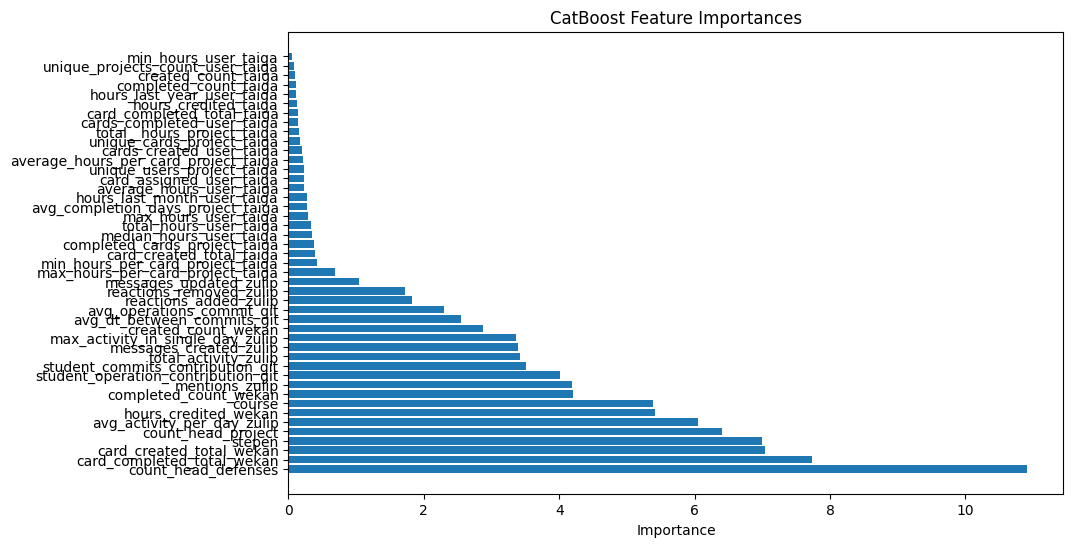

In [ ]:
import matplotlib.pyplot as plt

importances = model.get_feature_importance(Pool(X_train, y_train, cat_features=cat_features))

x = (dict(zip(X_train.columns, importances)))
x = dict(sorted(x.items(), key=lambda kv: kv[1]))

plt.figure(figsize=(10, 6))
plt.barh(x.keys(), x.values())
plt.title("CatBoost Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


# smote optuna

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['target_multiclass', 'target_encoded', 'target', 'year', 'department', 'type', 'course'])
y = df['target_encoded']

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
X[cat_features] = X[cat_features].fillna('nan')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

cat_features = X_train.select_dtypes(include='object').columns.tolist()
for col in cat_features:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col].astype(str))
    X_test[col] = encoder.transform(X_test[col].astype(str))

smote = SMOTE(random_state=42)
X_train = X_train.fillna(0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
def objective_smote(trial):
    params = {
        'iterations': trial.suggest_categorical('iterations', [100, 250, 500]),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'random_seed': 42,
        'eval_metric': 'TotalF1',
        'loss_function': 'MultiClass',
        'logging_level': 'Silent',
        'early_stopping_rounds': 20,
        'class_weights': class_weights,
        'task_type': 'GPU'
    }

    dataset = Pool(data=X_resampled, label=y_resampled, cat_features=cat_features)

    cv_result = cv(
        pool=dataset,
        params=params,
        fold_count=5,
        stratified=True,
        partition_random_seed=42,
        verbose=False,
        early_stopping_rounds=20,
        shuffle=True,
    )

    best_score = np.max(cv_result['test-TotalF1-mean'])
    return best_score

from optuna.samplers import TPESampler

study = optuna.create_study(direction='maximize', sampler=TPESampler(n_startup_trials=15, seed=42))
study.optimize(objective, n_trials=25)

print("Best trial:")
print(study.best_trial.params)


[I 2025-05-02 17:36:04,941] A new study created in memory with name: no-name-e0ac9fa3-3f0e-4b58-be78-0d98bf9930b9
[I 2025-05-02 17:36:08,435] Trial 0 finished with value: 0.3476444063596947 and parameters: {'iterations': 250, 'depth': 8, 'learning_rate': 0.0020513382630874496, 'l2_leaf_reg': 2.403950683025824}. Best is trial 0 with value: 0.3476444063596947.
[I 2025-05-02 17:36:13,003] Trial 1 finished with value: 0.3385540837614706 and parameters: {'iterations': 250, 'depth': 8, 'learning_rate': 0.0010994335574766201, 'l2_leaf_reg': 9.72918866945795}. Best is trial 0 with value: 0.3476444063596947.
[I 2025-05-02 17:36:15,072] Trial 2 finished with value: 0.3366829318836556 and parameters: {'iterations': 100, 'depth': 5, 'learning_rate': 0.0040596116104843075, 'l2_leaf_reg': 5.72280788469014}. Best is trial 0 with value: 0.3476444063596947.
[I 2025-05-02 17:36:16,699] Trial 3 finished with value: 0.3231210978088709 and parameters: {'iterations': 500, 'depth': 4, 'learning_rate': 0.0038

Best trial:
{'iterations': 500, 'depth': 10, 'learning_rate': 0.09693515868901686, 'l2_leaf_reg': 1.0437578612489107}


In [ ]:
model = CatBoostClassifier(**{'iterations': 500, 'depth': 10, 'learning_rate': 0.09693515868901686, 'l2_leaf_reg': 1.0437578612489107, 'random_seed': 42,
        'loss_function': 'MultiClass',
        'logging_level': 'Silent',
        'early_stopping_rounds': 20,
        'class_weights': class_weights}, cat_features = cat_features)

model.fit(X_resampled, y_resampled, early_stopping_rounds=20)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('TRAIN')
print(classification_report(y_train, y_pred_train))
print('TEST')
print(classification_report(y_test, y_pred))

TRAIN
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        80
           1       0.97      0.92      0.95       475
           2       0.71      0.93      0.81        74
           3       0.97      0.91      0.94       358

    accuracy                           0.92       987
   macro avg       0.85      0.94      0.89       987
weighted avg       0.94      0.92      0.93       987

TEST
              precision    recall  f1-score   support

           0       0.27      0.45      0.34        20
           1       0.62      0.53      0.57       119
           2       0.11      0.17      0.13        18
           3       0.51      0.49      0.50        90

    accuracy                           0.48       247
   macro avg       0.38      0.41      0.39       247
weighted avg       0.52      0.48      0.50       247



In [ ]:
report = classification_report(y_train, y_pred_train, output_dict=True)
report_test = classification_report(y_test, y_pred, output_dict=True)

res = pd.DataFrame(report).transpose().add_suffix('_train').merge(pd.DataFrame(report_test).transpose().add_suffix('_test'), left_index=True, right_index=True).rename('{}_smote_optuna'.format)
a.append(res)


# select features

In [ ]:
X_train

,stepen,total_activity_zulip,reactions_added_zulip,messages_created_zulip,mentions_zulip,max_activity_in_single_day_zulip,avg_activity_per_day_zulip,created_count_wekan,completed_count_wekan,hours_credited_wekan,...,avg_operations_commit_git,student_operation_contribution_git,avg_dt_between_commits_git,student_commits_contribution_git,messages_updated_zulip,reactions_removed_zulip,hours_last_month_user_taiga,hours_last_year_user_taiga,count_head_project,count_head_defenses
882,1,1565.0,427.0,1138.0,1045.0,141.0,23.919866,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,39.0,1.0,0.0,0.0,1.0,18.0
564,1,28.0,0.0,28.0,3.0,3.0,1.290323,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.0,3.0
1030,0,40.0,11.0,29.0,34.0,4.0,1.400000,0.0,0.0,0.0,...,0.163772,1.000000,0.411955,1.000000,0.0,0.0,0.0,0.0,9.0,55.0
570,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.0,21.0,...,0.726573,0.034677,0.216100,0.318841,0.0,0.0,0.0,0.0,0.0,0.0
870,0,15.0,5.0,10.0,5.0,12.0,3.318182,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,1,2.0,0.0,2.0,2.0,12.0,7.500000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
43,0,19.0,0.0,19.0,20.0,25.0,5.217391,3.0,0.0,0.0,...,0.550170,0.038105,0.545980,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
819,0,244.0,104.0,140.0,176.0,27.0,3.176972,0.0,0.0,0.0,...,0.584211,0.120906,0.480922,0.346420,1.0,0.0,0.0,0.0,0.0,0.0
983,0,2.0,0.0,2.0,1.0,2.0,1.666667,0.0,0.0,0.0,...,0.259568,1.000000,0.454274,0.840000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model = CatBoostClassifier(**{'iterations': 100,
 'depth': 10,
 'learning_rate': 0.09413189674237465,
 'l2_leaf_reg': 9.43219212425509, 'random_seed': 42,
        'loss_function': 'MultiClass',
        'logging_level': 'Silent',
        'early_stopping_rounds': 20,
        'class_weights': class_weights}, cat_features = cat_features)

train_pool = Pool(data=X_train, label=y_train, cat_features = cat_features)

try:
    summary = model.select_features(
        train_pool, 
        num_features_to_select=20,
        features_for_select=list(range(X_train.shape[1])),
        verbose=False
    )
    print(f"Выбранные признаки: {summary['selected_features']}")
except Exception as e:
    print(f"Произошла ошибка: {e}")

Выбранные признаки: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 28, 29, 30, 34, 35, 36, 37, 42, 43]


In [ ]:
sel = summary['selected_features']
cols = X_train.columns[sel]


In [ ]:
cols

Index(['total_activity_zulip', 'reactions_added_zulip',
       'messages_created_zulip', 'mentions_zulip',
       'max_activity_in_single_day_zulip', 'avg_activity_per_day_zulip',
       'created_count_wekan', 'completed_count_wekan', 'hours_credited_wekan',
       'card_completed_total_wekan', 'card_created_total_wekan',
       'total__hours_project_taiga', 'avg_completion_days_project_taiga',
       'max_hours_per_card_project_taiga', 'avg_operations_commit_git',
       'student_operation_contribution_git', 'avg_dt_between_commits_git',
       'student_commits_contribution_git', 'count_head_project',
       'count_head_defenses'],
      dtype='object')

In [ ]:
cols = ['total_activity_zulip', 'reactions_added_zulip',
       'messages_created_zulip', 'mentions_zulip',
       'max_activity_in_single_day_zulip', 'avg_activity_per_day_zulip',
       'created_count_wekan', 'completed_count_wekan', 'hours_credited_wekan',
       'card_completed_total_wekan', 'card_created_total_wekan',
       'total__hours_project_taiga', 'avg_completion_days_project_taiga',
       'max_hours_per_card_project_taiga', 'avg_operations_commit_git',
       'student_operation_contribution_git', 'avg_dt_between_commits_git',
       'student_commits_contribution_git', 'count_head_project',
       'count_head_defenses']

class_weights = [3.084375  , 0.51947368, 3.33445946, 0.68924581]

In [ ]:
model = CatBoostClassifier(**{'iterations': 100,
 'depth': 10,
 'learning_rate': 0.09413189674237465,
 'l2_leaf_reg': 9.43219212425509, 'random_seed': 42,
        'loss_function': 'MultiClass',
        'logging_level': 'Silent',
        'early_stopping_rounds': 20,
        'class_weights': class_weights})

cat_features = X_train[cols].select_dtypes(include=['object', 'category']).columns.tolist()

model.fit(X_train[cols], y_train, early_stopping_rounds=20, cat_features = cat_features)


y_pred = model.predict(X_test[cols])
y_pred_train = model.predict(X_train[cols])

print('TRAIN')
print(classification_report(y_train, y_pred_train))
print('TEST')
print(classification_report(y_test, y_pred))

TRAIN
              precision    recall  f1-score   support

           0       0.46      0.94      0.61        80
           1       0.90      0.72      0.80       475
           2       0.48      0.93      0.63        74
           3       0.80      0.68      0.73       358

    accuracy                           0.74       987
   macro avg       0.66      0.82      0.69       987
weighted avg       0.80      0.74      0.75       987

TEST
              precision    recall  f1-score   support

           0       0.31      0.55      0.40        20
           1       0.60      0.42      0.50       119
           2       0.17      0.39      0.24        18
           3       0.42      0.41      0.41        90

    accuracy                           0.43       247
   macro avg       0.38      0.44      0.39       247
weighted avg       0.48      0.43      0.44       247



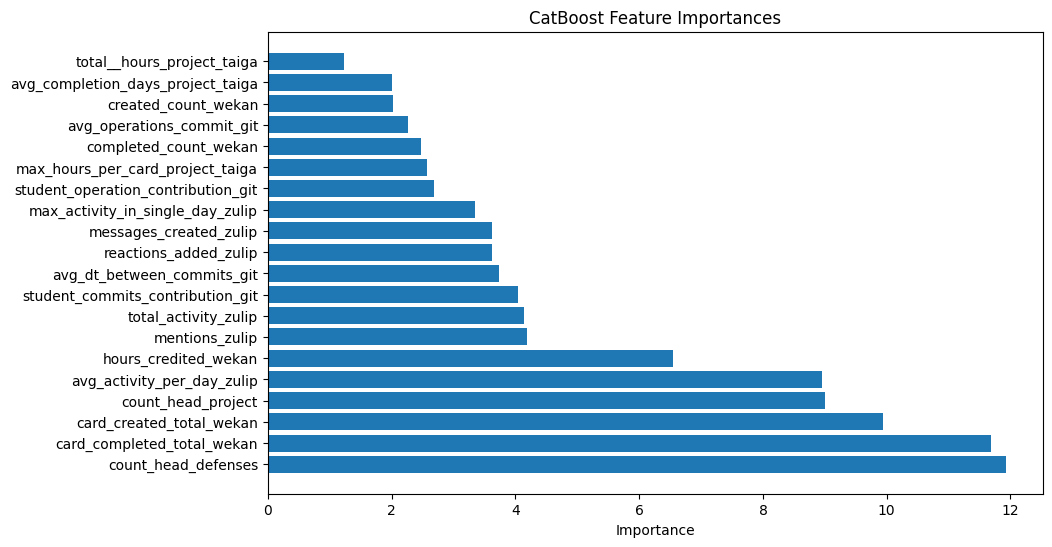

In [ ]:
import matplotlib.pyplot as plt

importances = model.get_feature_importance(Pool(X_train[cols], y_train, cat_features=cat_features))

x = (dict(zip(X_train[cols].columns, importances)))
x = dict(sorted(x.items(), key=lambda kv: kv[1]))

plt.figure(figsize=(10, 6))
plt.barh(x.keys(), x.values())
plt.title("CatBoost Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
x

{'total__hours_project_taiga': np.float64(1.2310066863801996),
 'avg_completion_days_project_taiga': np.float64(2.001952313730365),
 'created_count_wekan': np.float64(2.027935044593065),
 'avg_operations_commit_git': np.float64(2.2570633360157943),
 'completed_count_wekan': np.float64(2.467275143773099),
 'max_hours_per_card_project_taiga': np.float64(2.5735540308588365),
 'student_operation_contribution_git': np.float64(2.6910880545440428),
 'max_activity_in_single_day_zulip': np.float64(3.3446636230914484),
 'messages_created_zulip': np.float64(3.622304232553719),
 'reactions_added_zulip': np.float64(3.6294241615254266),
 'avg_dt_between_commits_git': np.float64(3.727366706020003),
 'student_commits_contribution_git': np.float64(4.0411558054832755),
 'total_activity_zulip': np.float64(4.139934124708231),
 'mentions_zulip': np.float64(4.187403487283886),
 'hours_credited_wekan': np.float64(6.548371626427884),
 'avg_activity_per_day_zulip': np.float64(8.960482253638713),
 'count_head_p

In [ ]:
report = classification_report(y_train, y_pred_train, output_dict=True)
report_test = classification_report(y_test, y_pred, output_dict=True)

res = pd.DataFrame(report).transpose().add_suffix('_train').merge(pd.DataFrame(report_test).transpose().add_suffix('_test'), left_index=True, right_index=True).rename('{}_weighted_optuna_selected'.format)
a.append(res)


In [ ]:
pd.concat(a)

,precision_train,recall_train,f1-score_train,support_train,precision_test,recall_test,f1-score_test,support_test
0_baseline,0.861538,0.700000,0.772414,80.000000,0.230769,0.150000,0.181818,20.000000
1_baseline,0.922131,0.947368,0.934579,475.000000,0.576389,0.697479,0.631179,119.000000
2_baseline,0.842857,0.797297,0.819444,74.000000,0.000000,0.000000,0.000000,18.000000
3_baseline,0.898352,0.913408,0.905817,358.000000,0.488095,0.455556,0.471264,90.000000
accuracy_baseline,0.903749,0.903749,0.903749,0.903749,0.514170,0.514170,0.514170,0.514170
macro avg_baseline,0.881220,0.839518,0.858064,987.000000,0.323813,0.325759,0.321065,247.000000
weighted avg_baseline,0.902651,0.903749,0.902371,987.000000,0.474228,0.514170,0.490528,247.000000
0_weight_class,0.739583,0.887500,0.806818,80.000000,0.350000,0.350000,0.350000,20.000000
1_weight_class,0.920668,0.928421,0.924528,475.000000,0.585938,0.630252,0.607287,119.000000
2_weight_class,0.828947,0.851351,0.840000,74.000000,0.111111,0.055556,0.074074,18.000000


In [ ]:
pd.concat(a).to_csv('results.csv', sep = ';', index=0)


# change hyperparams

In [ ]:
class_weights = [3.084375  , 0.51947368, 3.33445946, 0.68924581]

model = CatBoostClassifier(**{'iterations': 100,
 'depth': 10,
 'learning_rate': 0.09413189674237465,
 'l2_leaf_reg': 9.43219212425509, 'random_seed': 42,
        'loss_function': 'MultiClass',
        'logging_level': 'Silent',
        'early_stopping_rounds': 20,
        'class_weights': class_weights})

cat_features = X_train[cols].select_dtypes(include=['object', 'category']).columns.tolist()

model.fit(X_train[cols], y_train, early_stopping_rounds=20, cat_features = cat_features)
preds = model.predict(X_train[cols]).shape

y_pred = model.predict(X_test[cols])
y_pred_train = model.predict(X_train[cols])

print('TRAIN')
print(classification_report(y_train, y_pred_train))
print('TEST')
print(classification_report(y_test, y_pred))



TRAIN
              precision    recall  f1-score   support

           0       0.46      0.94      0.61        80
           1       0.90      0.72      0.80       475
           2       0.48      0.93      0.63        74
           3       0.80      0.68      0.73       358

    accuracy                           0.74       987
   macro avg       0.66      0.82      0.69       987
weighted avg       0.80      0.74      0.75       987

TEST
              precision    recall  f1-score   support

           0       0.31      0.55      0.40        20
           1       0.60      0.42      0.50       119
           2       0.17      0.39      0.24        18
           3       0.42      0.41      0.41        90

    accuracy                           0.43       247
   macro avg       0.38      0.44      0.39       247
weighted avg       0.48      0.43      0.44       247



In [ ]:
import pickle

with open("multiclass_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
X = df.drop(columns=['target_multiclass', 'target_encoded', 'target', 'year', 'department', 'type', 'course'])
y = df['target_encoded']

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
df[cat_features] = df[cat_features].fillna('nan')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

cat_features = X_train.select_dtypes(include='object').columns.tolist()
for col in cat_features:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col].astype(str))
    X_test[col] = encoder.transform(X_test[col].astype(str))

smote = SMOTE(random_state=42)
X_train = X_train.fillna(0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
df.to_csv('df.csv', sep = ';')

In [ ]:
import shap

explainer = shap.Explainer(model)
shaps = explainer(X_train[cols])

In [ ]:
len(cols)

20

In [ ]:
df[['target_multiclass', 'target_encoded']].drop_duplicates()

,target_multiclass,target_encoded
0,Хор,3
1,Уд,2
3,Отл,1
55,Неуд,0


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3])

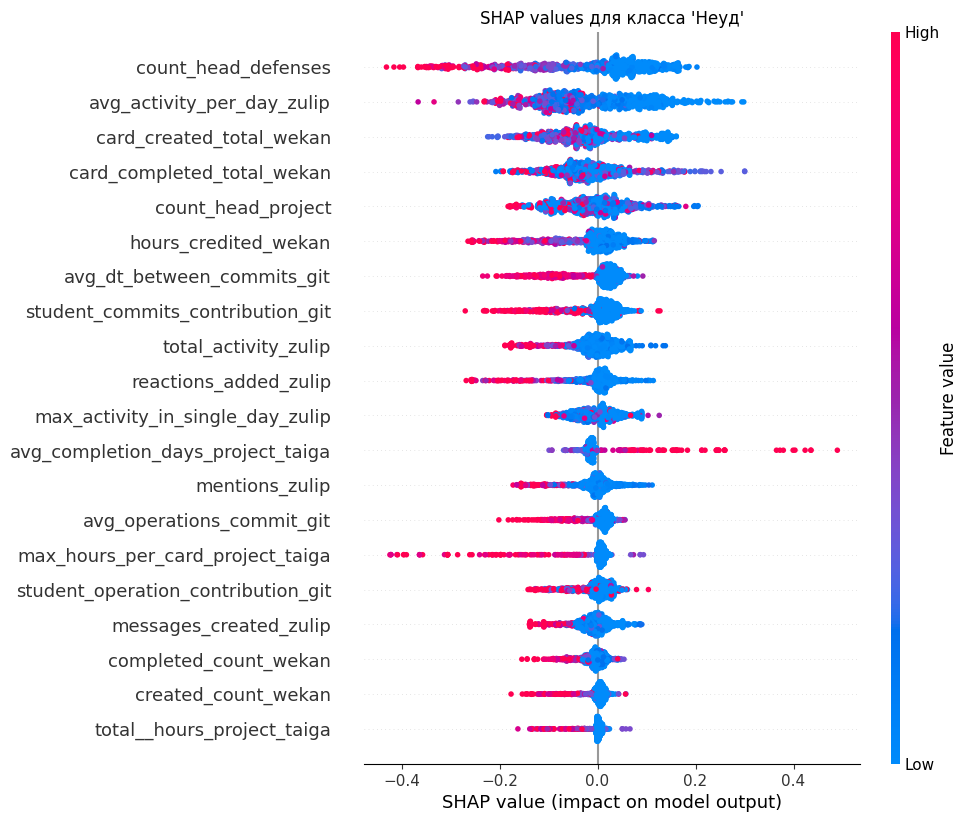

In [ ]:
plt.title(f"SHAP values для класса 'Неуд'")

shap.plots.beeswarm(shaps[:, :, 0], max_display=20) #Неуд

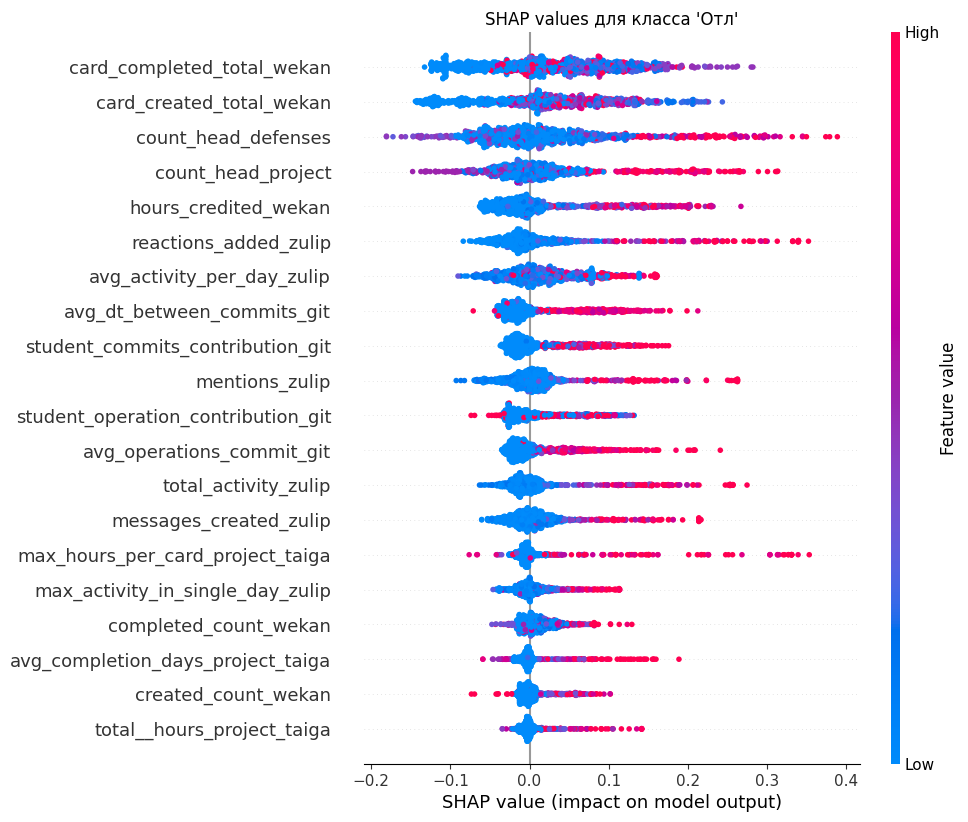

In [ ]:
plt.title(f"SHAP values для класса 'Отл'")

shap.plots.beeswarm(shaps[:, :, 1], max_display=20) # Отл


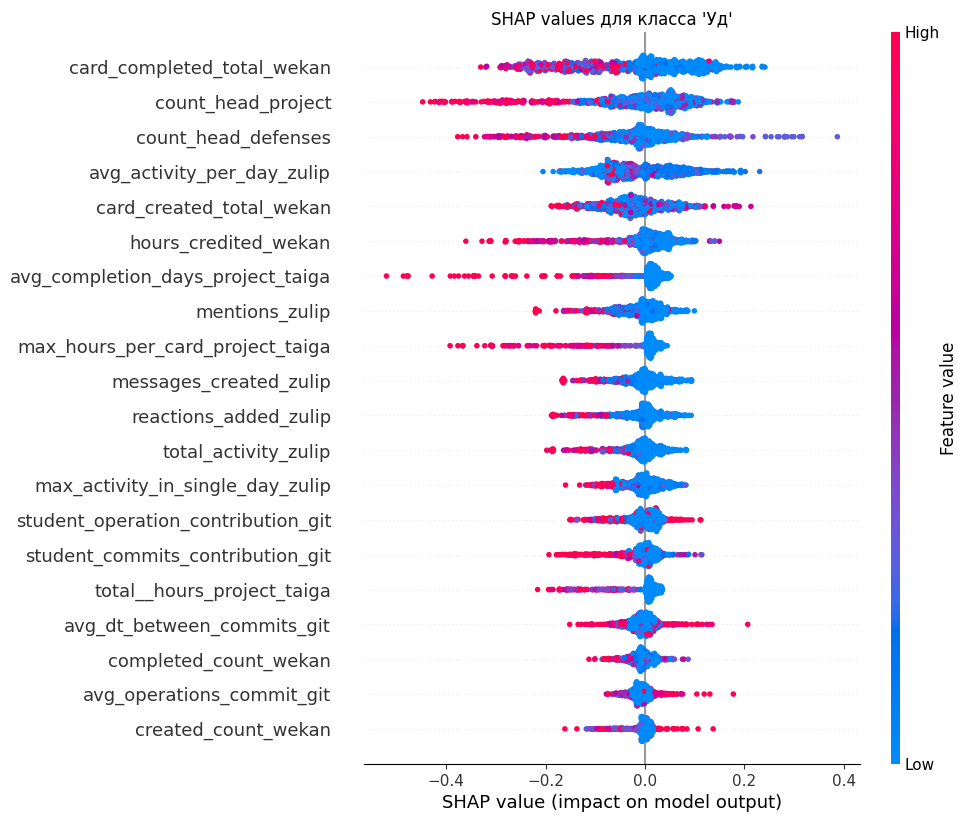

In [ ]:
plt.title(f"SHAP values для класса 'Уд'")

shap.plots.beeswarm(shaps[:, :, 2], max_display=20) # Уд

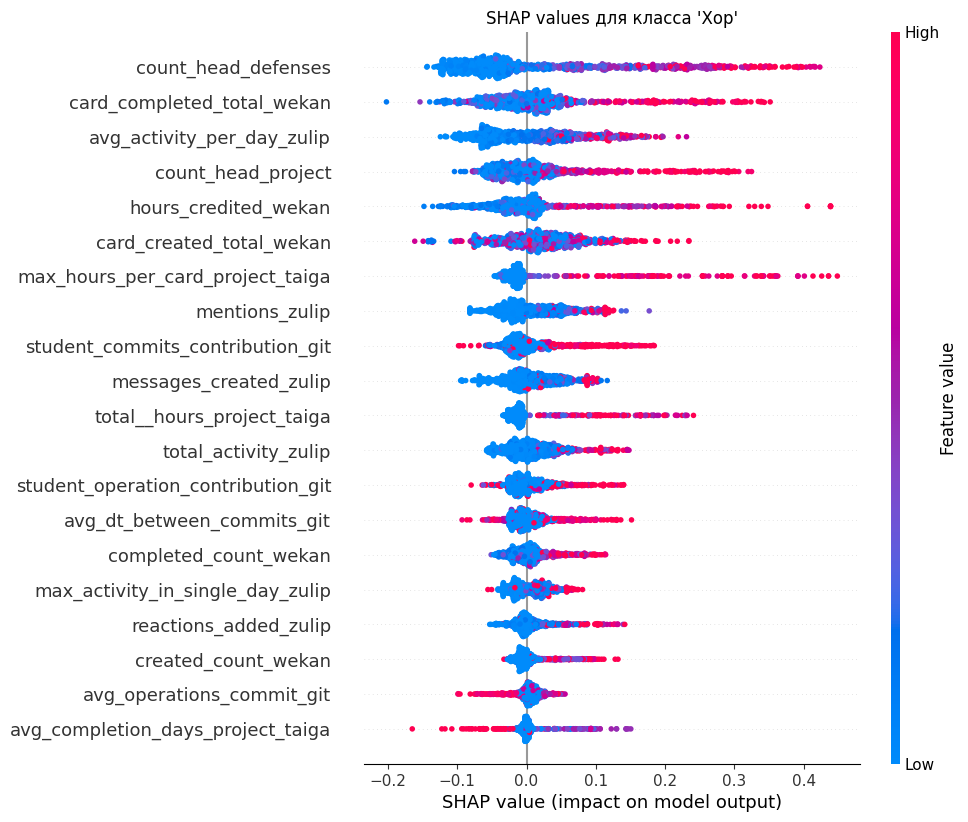

In [ ]:
plt.title(f"SHAP values для класса 'Хор'")

shap.plots.beeswarm(shaps[:, :, 3], max_display=20) # Хор


In [ ]:
shaps[:, :, 3].data

array([[1.56500000e+03, 4.27000000e+02, 1.13800000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 1.80000000e+01],
       [2.80000000e+01, 0.00000000e+00, 2.80000000e+01, ...,
        0.00000000e+00, 3.00000000e+00, 3.00000000e+00],
       [4.00000000e+01, 1.10000000e+01, 2.90000000e+01, ...,
        1.00000000e+00, 9.00000000e+00, 5.50000000e+01],
       ...,
       [2.44000000e+02, 1.04000000e+02, 1.40000000e+02, ...,
        3.46420323e-01, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
        8.40000000e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 4.00000000e+00]])

In [ ]:
new_shap = []

for i, x in enumerate(preds):
  shaps.values[i][:, x]

IndexError: index 987 is out of bounds for axis 1 with size 4

In [ ]:
preds

(987, 1)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_proba = model.predict_proba(X_test)  

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

roc_auc = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
print("ROC AUC (macro):", roc_auc)


ROC AUC (macro): 0.6724545439018377


# Способ 2: SVM

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['target_multiclass', 'target_encoded', 'target', 'year', 'department', 'type', 'course'])
y = df['target_encoded']

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
X[cat_features] = X[cat_features].fillna('nan')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

cat_features = X_train.select_dtypes(include='object').columns.tolist()
for col in cat_features:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col].astype(str))
    X_test[col] = encoder.transform(X_test[col].astype(str))

smote = SMOTE(random_state=42)
X_train = X_train.fillna(0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_test = X_test.fillna(0)

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear').fit(X_resampled, y_resampled)


In [ ]:
svm_predictions = svm_model_linear.predict(X_test)

accuracy = svm_model_linear.score(X_test, y_test)
cm = confusion_matrix(y_test, svm_predictions)

In [ ]:
print(classification_report(y_test, svm_predictions, ))

              precision    recall  f1-score   support

           0       0.17      0.50      0.25        20
           1       0.53      0.36      0.43       119
           2       0.06      0.17      0.09        18
           3       0.39      0.24      0.30        90

    accuracy                           0.32       247
   macro avg       0.29      0.32      0.27       247
weighted avg       0.42      0.32      0.34       247



In [ ]:
svm_predictions_train = svm_model_linear.predict(X_train)
print(classification_report(y_train, svm_predictions_train, ))


              precision    recall  f1-score   support

           0       0.20      0.61      0.31        80
           1       0.70      0.40      0.51       475
           2       0.16      0.46      0.24        74
           3       0.62      0.46      0.53       358

    accuracy                           0.44       987
   macro avg       0.42      0.48      0.40       987
weighted avg       0.59      0.44      0.48       987



## tuning svm

In [ ]:
X_resampled.isna().sum().sum()

np.int64(0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))
])

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto'],
    'svc__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

print("Best parameters:", grid_search.best_params_)
print("Best ROC-AUC score:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'svc__C': 0.1, 'svc__class_weight': None, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best ROC-AUC score: nan


In [ ]:
import numpy as np
print("Классы и их количество:", np.unique(y_resampled, return_counts=True))


Классы и их количество: (array([0, 1, 2, 3]), array([475, 475, 475, 475]))


In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC( **{'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}).fit(X_resampled, y_resampled)
svm_model_linear = svm_model_linear.fit(X_resampled, y_resampled)

svm_predictions = svm_model_linear.predict(X_test)

accuracy = svm_model_linear.score(X_test, y_test)

cm = confusion_matrix(y_test, svm_predictions)

In [ ]:
print('test')
print(classification_report(y_test, svm_predictions, ))

print('\ntrain')
svm_predictions_train = svm_model_linear.predict(X_train)
print(classification_report(y_train, svm_predictions_train, ))


test
              precision    recall  f1-score   support

           0       0.16      0.45      0.23        20
           1       0.55      0.34      0.42       119
           2       0.09      0.28      0.14        18
           3       0.41      0.28      0.33        90

    accuracy                           0.32       247
   macro avg       0.30      0.34      0.28       247
weighted avg       0.43      0.32      0.35       247


train
              precision    recall  f1-score   support

           0       0.19      0.57      0.29        80
           1       0.67      0.41      0.51       475
           2       0.17      0.47      0.25        74
           3       0.64      0.44      0.52       358

    accuracy                           0.44       987
   macro avg       0.42      0.47      0.39       987
weighted avg       0.58      0.44      0.47       987



In [ ]:
a = []
report = classification_report(y_train, svm_predictions_train, output_dict=True)
report_test = classification_report(y_test, svm_predictions, output_dict=True)

res = pd.DataFrame(report).transpose().add_suffix('_train').merge(pd.DataFrame(report_test).transpose().add_suffix('_test'), left_index=True, right_index=True).rename('{}_svm_tuned'.format)
a.append(res)


In [ ]:
pd.concat(a).round(2)

,precision_train,recall_train,f1-score_train,support_train,precision_test,recall_test,f1-score_test,support_test
0_svm_tuned,0.19,0.57,0.29,80.00,0.16,0.45,0.23,20.00
1_svm_tuned,0.67,0.41,0.51,475.00,0.55,0.34,0.42,119.00
2_svm_tuned,0.17,0.47,0.25,74.00,0.09,0.28,0.14,18.00
3_svm_tuned,0.64,0.44,0.52,358.00,0.41,0.28,0.33,90.00
accuracy_svm_tuned,0.44,0.44,0.44,0.44,0.32,0.32,0.32,0.32
macro avg_svm_tuned,0.42,0.47,0.39,987.00,0.30,0.34,0.28,247.00
weighted avg_svm_tuned,0.58,0.44,0.47,987.00,0.43,0.32,0.35,247.00


In [ ]:
    from sklearn.inspection import permutation_importance
    import numpy as np

    result = permutation_importance(svm_model_linear, X_train, y_train, n_repeats=10, random_state=42)

NameError: name 'feature_names' is not defined

In [ ]:
    importances = result.importances_mean
    df_importance = pd.DataFrame(importances, index=X_train.columns, columns=['importance'])
    df_importance['abs_importance'] = df_importance['importance'].abs()
    df_importance = df_importance.sort_values('abs_importance', ascending=False)

    print("Feature importances (permutation importance):")
    print(df_importance)

Feature importances (permutation importance):
                                      importance  abs_importance
count_head_defenses                     0.124620        0.124620
completed_cards_project_taiga           0.081560        0.081560
count_head_project                      0.077102        0.077102
card_assigned_user_taiga                0.076292        0.076292
unique_cards_project_taiga              0.059271        0.059271
max_hours_per_card_project_taiga        0.050659        0.050659
total_hours_user_taiga                  0.047518        0.047518
cards_completed_user_taiga              0.046606        0.046606
max_hours_user_taiga                    0.042655        0.042655
total__hours_project_taiga              0.042047        0.042047
max_activity_in_single_day_zulip        0.041540        0.041540
messages_created_zulip                  0.036575        0.036575
avg_completion_days_project_taiga       0.036272        0.036272
avg_activity_per_day_zulip              0.03

In [ ]:
cols2 = df_importance.head(20).index.values

In [ ]:
cols2

array(['count_head_defenses', 'completed_cards_project_taiga',
       'count_head_project', 'card_assigned_user_taiga',
       'unique_cards_project_taiga', 'max_hours_per_card_project_taiga',
       'total_hours_user_taiga', 'cards_completed_user_taiga',
       'max_hours_user_taiga', 'total__hours_project_taiga',
       'max_activity_in_single_day_zulip', 'messages_created_zulip',
       'avg_completion_days_project_taiga', 'avg_activity_per_day_zulip',
       'average_hours_per_card_project_taiga',
       'card_completed_total_wekan', 'card_created_total_wekan',
       'median_hours_user_taiga', 'stepen', 'average_hours_user_taiga'],
      dtype=object)

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC( **{'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}).fit(X_resampled[cols2], y_resampled)

svm_predictions = svm_model_linear.predict(X_test[cols2])

accuracy = svm_model_linear.score(X_test[cols2], y_test)

cm = confusion_matrix(y_test, svm_predictions)

In [ ]:
print('test')
print(classification_report(y_test, svm_predictions, ))

print('\ntrain')
svm_predictions_train = svm_model_linear.predict(X_train[cols2])
print(classification_report(y_train, svm_predictions_train, ))


test
              precision    recall  f1-score   support

           0       0.21      0.20      0.21        20
           1       0.56      0.37      0.45       119
           2       0.11      0.61      0.19        18
           3       0.46      0.27      0.34        90

    accuracy                           0.34       247
   macro avg       0.34      0.36      0.29       247
weighted avg       0.47      0.34      0.37       247


train
              precision    recall  f1-score   support

           0       0.18      0.23      0.20        80
           1       0.69      0.40      0.50       475
           2       0.15      0.76      0.24        74
           3       0.62      0.39      0.48       358

    accuracy                           0.41       987
   macro avg       0.41      0.44      0.36       987
weighted avg       0.58      0.41      0.45       987



In [ ]:
report = classification_report(y_train, svm_predictions_train, output_dict=True)
report_test = classification_report(y_test, svm_predictions, output_dict=True)

res = pd.DataFrame(report).transpose().add_suffix('_train').merge(pd.DataFrame(report_test).transpose().add_suffix('_test'), left_index=True, right_index=True).rename('{}_svm_tuned_20features'.format)
a.append(res)


In [ ]:
pd.concat(a).round(2).to_csv('svm.csv', sep=  ';')

In [ ]:
pd.concat(a).round(2).to_csv('svm.csv', sep=  ';')


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_proba = svm_model_linear.predict_proba(X_test[cols2])

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

roc_auc = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
print("ROC AUC (macro):", roc_auc)


AttributeError: This 'SVC' has no attribute 'predict_proba'

In [ ]:
    result = permutation_importance(svm_model_linear, X_train[cols2], y_train, n_repeats=10, random_state=42)

    importances = result.importances_mean
    df_importance = pd.DataFrame(importances, index=X_train[cols2].columns, columns=['importance'])
    df_importance['abs_importance'] = df_importance['importance'].abs()
    df_importance = df_importance.sort_values('abs_importance', ascending=False)

    print("Feature importances (permutation importance):")
    print(df_importance)

Feature importances (permutation importance):
                                      importance  abs_importance
count_head_defenses                     0.114184        0.114184
count_head_project                      0.068592        0.068592
card_assigned_user_taiga                0.068186        0.068186
unique_cards_project_taiga              0.065856        0.065856
max_hours_per_card_project_taiga        0.062513        0.062513
total_hours_user_taiga                  0.059271        0.059271
total__hours_project_taiga              0.057143        0.057143
cards_completed_user_taiga              0.050963        0.050963
average_hours_per_card_project_taiga    0.043668        0.043668
max_hours_user_taiga                    0.043364        0.043364
completed_cards_project_taiga           0.036879        0.036879
avg_completion_days_project_taiga       0.036272        0.036272
max_activity_in_single_day_zulip        0.032421        0.032421
card_created_total_wekan                0.02

In [ ]:
df_importance

,importance,abs_importance
count_head_defenses,0.114184,0.114184
count_head_project,0.068592,0.068592
card_assigned_user_taiga,0.068186,0.068186
unique_cards_project_taiga,0.065856,0.065856
max_hours_per_card_project_taiga,0.062513,0.062513
total_hours_user_taiga,0.059271,0.059271
total__hours_project_taiga,0.057143,0.057143
cards_completed_user_taiga,0.050963,0.050963
average_hours_per_card_project_taiga,0.043668,0.043668
max_hours_user_taiga,0.043364,0.043364
